#  Data Analysis Interview Challenge

### Load Packages

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

C:\Users\eboci_000\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Data

In [3]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


## Part 1: Exploratory Data Analysis

### Aggregate login counts by 15m time intervals.

In [5]:
df15 = df
df15['count'] = 1
df15 = df.resample('15min', on='login_time').sum()
df15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


### Check for missing values and get an overview of the data.

In [6]:
print('# of missing values:', df15.isnull().sum())

# of missing values: count    0
dtype: int64


There is not an issue with missing values.

In [7]:
df15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


### Distribution

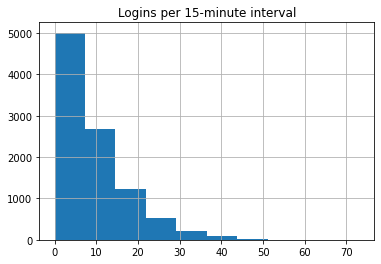

In [8]:
df15.hist()
plt.title('Logins per 15-minute interval')
plt.show()

It is seen that 75% of the 15min intervals have login counts that are 13 or lower. 

### Time Series

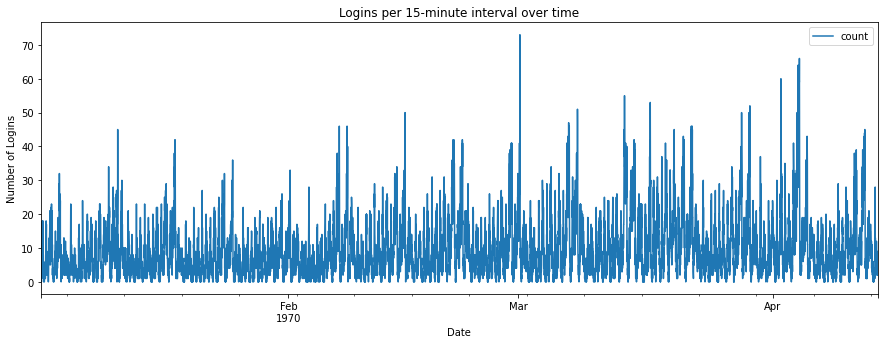

In [9]:
df15.plot(xlabel='Date', ylabel='Number of Logins', figsize=(15,5), kind='line')
plt.title('Logins per 15-minute interval over time')
plt.show()

Over time there are definitive peaks. These can be further explored to see if there are daily, weekly, and monthly patterns.

### Aggregate by Day

In [11]:
dfday = df
dfday['count'] = 1
dfday = dfday.resample('D', on='login_time').sum()
dfday.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


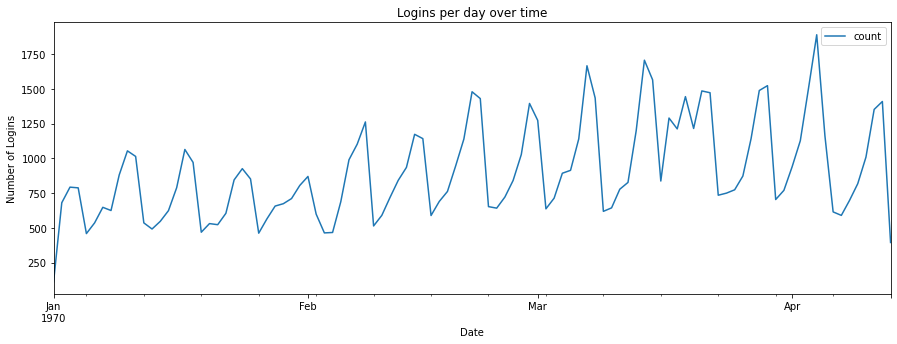

In [13]:
dfday.plot(xlabel='Date', ylabel='Number of Logins', figsize=(15,5), kind='line')
plt.title('Logins per day over time')
plt.show()

The generall trend is seen to be increasing over time with increases throughout each week. Overall trend can be better observed even further by aggegating the data into weeks.

### Aggregate by Week

In [15]:
dfw = df
dfw['count'] = 1
dfw = dfw.resample('W', on='login_time').sum()
dfw.head()

,count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744


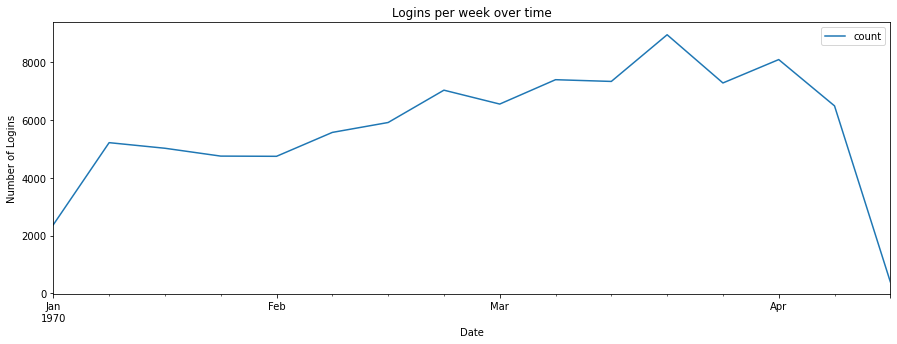

In [16]:
dfw.plot(xlabel='Date', ylabel='Number of Logins', figsize=(15,5), kind='line')
plt.title('Logins per week over time')
plt.show()

Before, the general trend of increase in logins could be seen. Now, it also becomes apparent that there is a significant decrease in logins in April.

# Part 2: Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

##### 1 ) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The key measure of success would be for each city to have an increase in completed rides as the goal is for each city to increase the activity of driving partners.

##### 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
 
##### a. how you will implement the experiment
 
###### b. what statistical test(s) you will conduct to verify the significance of the observation
 
###### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

a. Randomly select drivers from the driving partners to track driving patterns. From this selection, then randomly select a group that will be reimbursed for their toll costs.

b. A/B testing can be used to determine if there is a difference between the two groups. A difference would mean that reimbursing all toll costs does encourage driving partners to complete rides in both cities.

c. To determine if the difference is statistically significant, the p-value will be calculated. If the p-value is high, then the null hypthesis, the toll reimbursement having no effect, would not be rejected. If the p-value is low, then we can rejected the null hypothesis and recommend that the toll reimbursement has a positive impact on ride completions in both cities.

# Part 3: Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

In [87]:
#Load the Data
df2 = pd.read_json('ultimate_data_challenge.json')

#Verify that it loaded correctly.
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


#### Data Cleaning: Missing Values

In [89]:
#Missing values percentages.
missing= pd.concat([pd.isnull(df2).sum(), 100 * pd.isnull(df2).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
city,0,0.000
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000
weekday_pct,0,0.000
avg_dist,0,0.000
avg_rating_by_driver,201,0.402


In [90]:
df2['phone'].unique()

array(['iPhone', 'Android', None], dtype=object)

There is missing values for both types of ratings. However, the pecentage of missing values is relatively low, so those values will be filled in. Phone will be filled in as other to avoid adding bias towards android or iphone.

In [91]:
#Fill nan values of ratings with the mean.
df2 = df2.fillna(df2.mean())

In [92]:
#Fill nan values of phone.
df2['phone'] = df2.phone.fillna('other')

In [93]:
df2['phone'].unique()

array(['iPhone', 'Android', 'other'], dtype=object)

In [94]:
#Missing values percentages.
missing= pd.concat([pd.isnull(df2).sum(), 100 * pd.isnull(df2).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
city,0,0.0
trips_in_first_30_days,0,0.0
signup_date,0,0.0
avg_rating_of_driver,0,0.0
avg_surge,0,0.0
last_trip_date,0,0.0
phone,0,0.0
surge_pct,0,0.0
ultimate_black_user,0,0.0
weekday_pct,0,0.0


#### Data Cleaning: Data Types

In [95]:
df2.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

Dates are as objects and need to be converted.

In [96]:
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])
df2['signup_date'] = pd.to_datetime(df2['signup_date'])

In [97]:
df2.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

#### Data Prep: Define Active Users

In [98]:
#Determine date to compare.
df2.last_trip_date.max()

Timestamp('2014-07-01 00:00:00')

In [99]:
#Users are active if last trip was within the last 30 days.
df2['active'] = df2['last_trip_date'].apply(lambda date: 'active' if (df2.last_trip_date.max() - date).days < 30 else 'inactive')

In [100]:
df2['active'].head()

0      active
1    inactive
2    inactive
3      active
4    inactive
Name: active, dtype: object

In [101]:
df2['active'].value_counts()

inactive    31690
active      18310
Name: active, dtype: int64

#### Data Exploration

Correlation Between Features


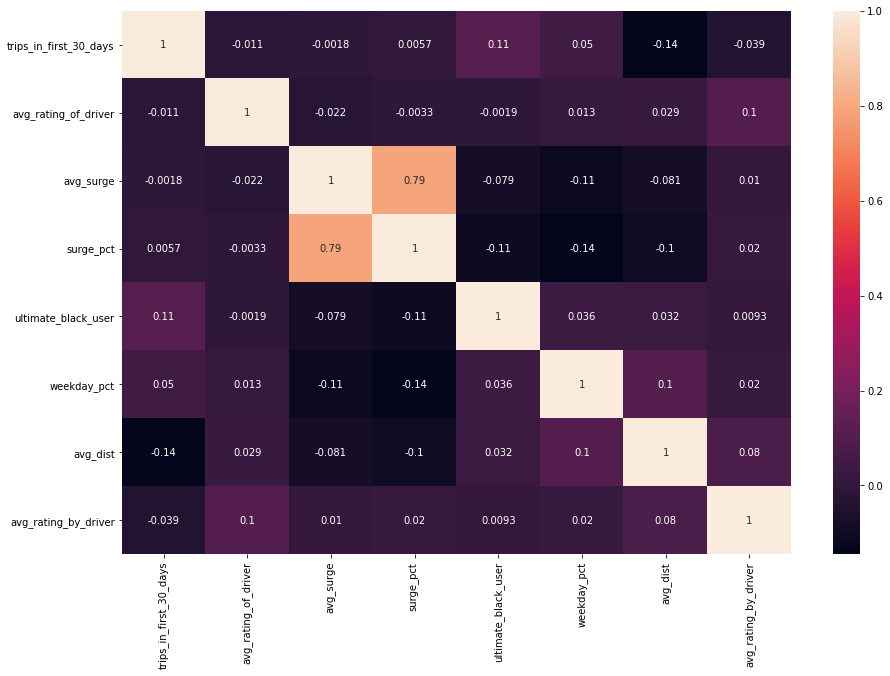

In [102]:
#Visualize correlation between features
plt.figure(figsize=(15,10))
print('Correlation Between Features')
sns.heatmap(df2.corr(), annot=True);

There is a strong correlations between surge percentage and average surge, but they are not necesarily dependent upon each other, so both features can remain for initial modeling.

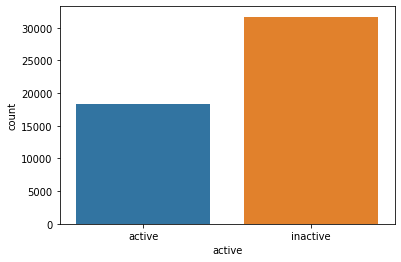

In [103]:
#Explore Active Users
sns.countplot(df2['active']);

In [104]:
print('Active User Percentage:',
      round((len(df2.active.loc[df2.active == 'active'])/len(df2.active)) * 100))

Active User Percentage: 37


Users who are active are the smaller percentage of all users.

#### Logistic Regression Model for Predicting Active Classification

In [128]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [106]:
#Encode Categories
df2.city = LabelEncoder().fit_transform(df2.city)
df2.phone = LabelEncoder().fit_transform(df2.phone)
df2.ultimate_black_user = LabelEncoder().fit_transform(df2.ultimate_black_user)
df2.active_status = LabelEncoder().fit_transform(df2.active)

C:\Users\eboci_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [107]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,1,4,2014-01-25,4.7,1.10,2014-06-17,1,15.4,1,46.2,3.67,5.0,active
1,0,0,2014-01-29,5.0,1.00,2014-05-05,0,0.0,0,50.0,8.26,5.0,inactive
2,0,3,2014-01-06,4.3,1.00,2014-01-07,1,0.0,0,100.0,0.77,5.0,inactive
3,1,9,2014-01-10,4.6,1.14,2014-06-29,1,20.0,1,80.0,2.36,4.9,active
4,2,14,2014-01-27,4.4,1.19,2014-03-15,0,11.8,0,82.4,3.13,4.9,inactive


In [129]:
#Create feature/target variables
X = df2.drop(columns = ['active', 'last_trip_date','signup_date'])
y = df2['active']

In [130]:
#Split into test and train
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [131]:
#Scaler
x_train = QuantileTransformer().fit_transform(x_train)
x_test = QuantileTransformer().fit_transform(x_test)

In [132]:
#Create model
model = LogisticRegression()

#Fit the model on the training data
model.fit(x_train, y_train)

C:\Users\eboci_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
predictions = model.predict(x_test)

#Print the accuracy score and classification report from the testing data
print(accuracy_score(model.predict(x_test), y_test))

print(classification_report(y_test, predictions))

0.7345
              precision    recall  f1-score   support

      active       0.69      0.51      0.59      3678
    inactive       0.75      0.87      0.80      6322

    accuracy                           0.73     10000
   macro avg       0.72      0.69      0.70     10000
weighted avg       0.73      0.73      0.72     10000



Logistic Regression was chosen because it is one of the simplest models to maintain and in this case it has decent accuracy with precision that is similar. A concern is that this based off of past month active users, and the company is interested in predicting 6 month activity. To further validate the model, improvement upon the target variable may be needed.

Information gained from the model can be used for trageting future encentives to maintain avtivity levels.